## Comparing flood events with flood insurance

### read packages and files

In [79]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

In [81]:
nfip_df = pd.read_csv('nfip.csv',
                   dtype = {
                       'State': str,
                       'County': str,
                       'Community_Name_Number': str,
                       'Policies_in_Force': int,
                       'Total_Coverage': float,
                       'Total_Written_Premium_FPF': float
                        })

In [82]:
nfip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25151 entries, 0 to 25150
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      25151 non-null  object 
 1   County                     25151 non-null  object 
 2   Community_Name_Number      25151 non-null  object 
 3   Policies_in_Force          25151 non-null  int64  
 4   Total_Coverage             25151 non-null  float64
 5   Total_Written_Premium_FPF  25151 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB


In [83]:
nfip_df.columns

Index(['State', 'County', 'Community_Name_Number', 'Policies_in_Force',
       'Total_Coverage', 'Total_Written_Premium_FPF'],
      dtype='object')

In [84]:
nfip_cov_df = nfip_df.groupby(by=['State','County'])['Total_Coverage'].sum()

In [85]:
nfip_cov_df = nfip_cov_df.reset_index()

In [86]:
nfip_cov_df['Total_Coverage'] = nfip_cov_df['Total_Coverage']/1000000

In [88]:
nfip_cov_df['County'] = nfip_cov_df['County'].str.replace(' COUNTY', '')
nfip_cov_df['location'] = nfip_cov_df['County']+", "+nfip_cov_df['State']

In [89]:
nfip_cov_df

,State,County,Total_Coverage,location
0,ALABAMA,AUTAUGA,63.116,"AUTAUGA, ALABAMA"
1,ALABAMA,BALDWIN,6506.829,"BALDWIN, ALABAMA"
2,ALABAMA,BARBOUR,9.462,"BARBOUR, ALABAMA"
3,ALABAMA,BIBB,4.162,"BIBB, ALABAMA"
4,ALABAMA,BLOUNT,8.927,"BLOUNT, ALABAMA"
...,...,...,...,...
3047,WYOMING,TETON,160.115,"TETON, WYOMING"
3048,WYOMING,UINTA,17.456,"UINTA, WYOMING"
3049,WYOMING,Unknown,4.680,"Unknown, WYOMING"
3050,WYOMING,WASHAKIE,2.650,"WASHAKIE, WYOMING"


In [90]:
nfip_cov_df.groupby(by='State')['Total_Coverage'].sum().sort_values(ascending=False)

State
FLORIDA                 440584.4680
TEXAS                   205664.6640
LOUISIANA               132133.0324
CALIFORNIA               58931.9370
SOUTH CAROLINA           55728.6940
NEW JERSEY               54155.3588
NEW YORK                 47180.5986
NORTH CAROLINA           36581.8386
VIRGINIA                 26580.5460
GEORGIA                  21371.4090
MARYLAND                 16335.2520
MASSACHUSETTS            15043.6320
MISSISSIPPI              14990.3430
HAWAII                   14166.4780
ALABAMA                  12721.8380
PENNSYLVANIA             10885.0622
WASHINGTON                8691.4458
CONNECTICUT               8532.3400
DELAWARE                  7297.3350
ILLINOIS                  7050.1910
TENNESSEE                 6845.3864
OREGON                    6626.1460
ARIZONA                   6493.9660
OHIO                      5262.2310
COLORADO                  5018.2770
MICHIGAN                  4288.2358
MISSOURI                  3844.3420
INDIANA               

In [91]:
noaa_df = pd.read_csv("NOAA_AllClusters_All_Counties.csv")

In [92]:
noaa_df.columns

Index(['FIPS', 'Drought', 'Dust Storm', 'Fire and Related Events',
       'Flood_and_Related_Events', 'Hurricanes and Tropical Storms',
       'Marine Costal and Wave Events', 'Marine Severe Storms',
       'Severe Storms and Wind', 'Tornado', 'Winter Cold and Freezing',
       'Winter Storms', 'cluster', 'State', 'County', 'Total_Property_Damage'],
      dtype='object')

In [93]:
noaa_df

,FIPS,Drought,Dust Storm,Fire and Related Events,Flood_and_Related_Events,Hurricanes and Tropical Storms,Marine Costal and Wave Events,Marine Severe Storms,Severe Storms and Wind,Tornado,Winter Cold and Freezing,Winter Storms,cluster,State,County,Total_Property_Damage
0,0500000US01001,0,0,0,6,1,0,0,10,11,0,0,7,ALABAMA,AUTAUGA,14304600
1,0500000US01003,0,0,0,12,0,0,0,16,7,0,0,6,ALABAMA,BALDWIN,30850000
2,0500000US01005,0,0,0,2,1,0,0,3,4,0,0,0,ALABAMA,BARBOUR,555000
3,0500000US01007,0,0,0,3,1,0,0,3,4,0,0,0,ALABAMA,BIBB,14538750
4,0500000US01009,0,0,0,2,1,0,0,15,12,0,1,7,ALABAMA,BLOUNT,26324000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,0500000US56037,0,0,1,4,0,0,0,1,1,0,0,0,WYOMING,SWEETWATER,1975000
3015,0500000US56039,0,0,0,1,0,0,0,2,0,0,0,0,WYOMING,TETON,205000
3016,0500000US56041,0,0,2,0,0,0,0,0,0,0,0,0,WYOMING,UINTA,1000000
3017,0500000US56043,0,0,0,5,0,0,0,2,1,0,0,0,WYOMING,WASHAKIE,685000


In [94]:
noaa_df['location'] = noaa_df['County']+", "+noaa_df['State']

In [95]:
noaa_flood_df = noaa_df[['location', 'Flood_and_Related_Events', 'cluster']]

### Census data

In [98]:
census_df = pd.read_csv('census.csv')

In [100]:
census_df['location'] = census_df['County']+", "+census_df['State']

In [101]:
census_df

,FIPS,POPULATION,POP_DENSITY,PCT_URBAN,MEDIAN_INCOME,cluster,State,County,location
0,0500000US01001,58239,91.8,0.590,31338,0,ALABAMA,AUTAUGA,"AUTAUGA, ALABAMA"
1,0500000US01003,227131,114.6,0.672,35140,7,ALABAMA,BALDWIN,"BALDWIN, ALABAMA"
2,0500000US01005,25259,31.0,0.351,20704,9,ALABAMA,BARBOUR,"BARBOUR, ALABAMA"
3,0500000US01007,22412,36.8,0.000,22535,9,ALABAMA,BIBB,"BIBB, ALABAMA"
4,0500000US01009,58884,88.9,0.093,23818,0,ALABAMA,BLOUNT,"BLOUNT, ALABAMA"
...,...,...,...,...,...,...,...,...,...
3138,0500000US56037,42459,4.2,0.879,40691,0,WYOMING,SWEETWATER,"SWEETWATER, WYOMING"
3139,0500000US56039,23319,5.3,0.373,68047,9,WYOMING,TETON,"TETON, WYOMING"
3140,0500000US56041,20514,10.1,0.575,39598,9,WYOMING,UINTA,"UINTA, WYOMING"
3141,0500000US56043,7768,3.8,0.656,31628,9,WYOMING,WASHAKIE,"WASHAKIE, WYOMING"


### Merge flood insurance coverage with flood event counts and census data

In [206]:
 flood_df= pd.merge(noaa_flood_df, nfip_cov_df, on='location', how='inner')

In [207]:
census_flood_df = census_df[['location', 'POP_DENSITY', 'MEDIAN_INCOME']]

In [208]:
flood_df= pd.merge(flood_df, census_flood_df, on='location', how='inner')

In [209]:
flood_df

,location,Flood_and_Related_Events,cluster,State,County,Total_Coverage,POP_DENSITY,MEDIAN_INCOME
0,"AUTAUGA, ALABAMA",6,7,ALABAMA,AUTAUGA,63.116,91.8,31338
1,"BALDWIN, ALABAMA",12,6,ALABAMA,BALDWIN,6506.829,114.6,35140
2,"BARBOUR, ALABAMA",2,0,ALABAMA,BARBOUR,9.462,31.0,20704
3,"BIBB, ALABAMA",3,0,ALABAMA,BIBB,4.162,36.8,22535
4,"BLOUNT, ALABAMA",2,7,ALABAMA,BLOUNT,8.927,88.9,23818
...,...,...,...,...,...,...,...,...
2791,"SWEETWATER, WYOMING",4,0,WYOMING,SWEETWATER,16.600,4.2,40691
2792,"TETON, WYOMING",1,0,WYOMING,TETON,160.115,5.3,68047
2793,"UINTA, WYOMING",0,0,WYOMING,UINTA,17.456,10.1,39598
2794,"WASHAKIE, WYOMING",5,0,WYOMING,WASHAKIE,2.650,3.8,31628


## Create scatter plot

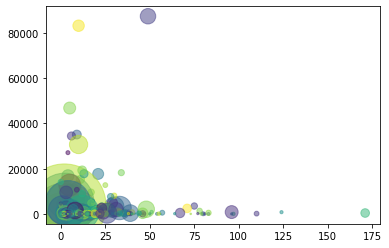

In [116]:
x = flood_df['Flood_and_Related_Events']
y = flood_df['Total_Coverage']
colors = np.random.rand(len(x))
area = flood_df['POP_DENSITY']/10  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

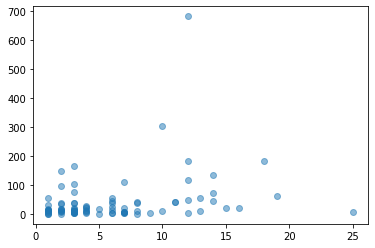

In [118]:
flood_df[flood_df.State =='INDIANA'].sort_values(by = 'Total_Coverage', ascending=False).head(50)

,location,Flood_and_Related_Events,cluster,State,County,Total_Coverage,POP_DENSITY,MEDIAN_INCOME
671,"MARION, INDIANA",12,6,INDIANA,MARION,680.903,2279.6,38014
668,"LAKE, INDIANA",10,6,INDIANA,LAKE,302.033,994.1,36103
704,"VANDERBURGH, INDIANA",18,6,INDIANA,VANDERBURGH,183.233,769.7,33488
652,"HAMILTON, INDIANA",12,1,INDIANA,HAMILTON,183.036,696.4,54642
634,"CLARK, INDIANA",3,7,INDIANA,CLARK,166.135,295.6,36466
626,"ALLEN, INDIANA",2,7,INDIANA,ALLEN,146.228,540.6,37105
706,"VIGO, INDIANA",14,8,INDIANA,VIGO,134.897,267.4,31457
627,"BARTHOLOMEW, INDIANA",12,7,INDIANA,BARTHOLOMEW,116.581,188.7,41654
664,"JOHNSON, INDIANA",7,6,INDIANA,JOHNSON,111.523,435.8,41531
666,"KOSCIUSKO, INDIANA",3,7,INDIANA,KOSCIUSKO,102.548,145.6,36369


In [59]:
flood_df[flood_df.State =='INDIANA'].sort_values(by = 'Flood_and_Related_Events', ascending=False).head(50)

,location,Flood_and_Related_Events,State,County,Total_Coverage
649,"GIBSON, INDIANA",25,INDIANA,GIBSON,5.072
677,"MORGAN, INDIANA",19,INDIANA,MORGAN,60.637
704,"VANDERBURGH, INDIANA",18,INDIANA,VANDERBURGH,183.233
665,"KNOX, INDIANA",16,INDIANA,KNOX,20.721
687,"POSEY, INDIANA",15,INDIANA,POSEY,19.290
641,"DELAWARE, INDIANA",14,INDIANA,DELAWARE,73.430
659,"JACKSON, INDIANA",14,INDIANA,JACKSON,43.961
706,"VIGO, INDIANA",14,INDIANA,VIGO,134.897
682,"OWEN, INDIANA",13,INDIANA,OWEN,9.788
675,"MONROE, INDIANA",13,INDIANA,MONROE,54.925


## linear regression

Indiana


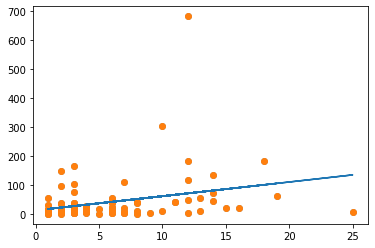

In [140]:
x = flood_df[flood_df.State =='INDIANA']['Flood_and_Related_Events'].to_numpy()
y = flood_df[flood_df.State =='INDIANA']['Total_Coverage'].to_numpy()
plt.scatter(x, y, alpha=0.5)

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
print("Indiana")
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [126]:
flood_df.groupby(by='cluster').count()

,location,Flood_and_Related_Events,State,County,Total_Coverage,POP_DENSITY,MEDIAN_INCOME
cluster,,,,,,,
0,1194,1194,1194,1194,1194,1194,1194
1,176,176,176,176,176,176,176
2,16,16,16,16,16,16,16
3,74,74,74,74,74,74,74
4,3,3,3,3,3,3,3
5,31,31,31,31,31,31,31
6,378,378,378,378,378,378,378
7,767,767,767,767,767,767,767
8,151,151,151,151,151,151,151


Cluster: 0
r: 0.028


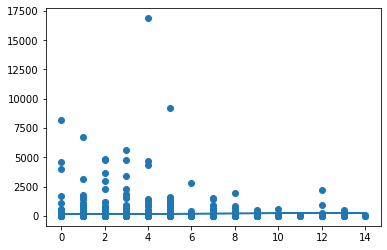

************************************************
Cluster: 1
r: 0.039


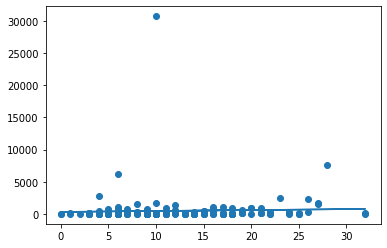

************************************************
Cluster: 2
r: -0.135


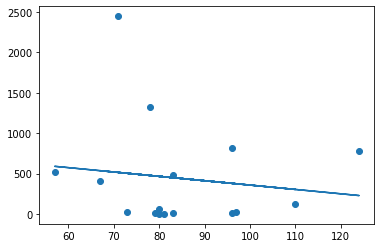

************************************************
Cluster: 3
r: 0.212


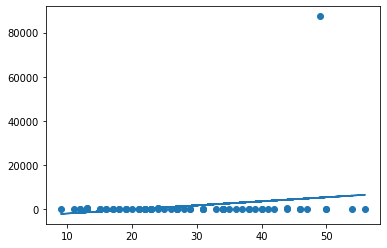

************************************************
Cluster: 4
r: -0.665


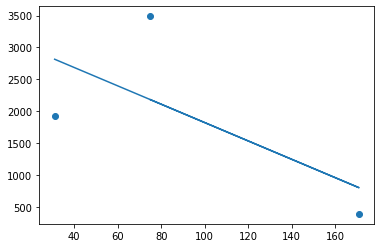

************************************************
Cluster: 5
r: 0.388


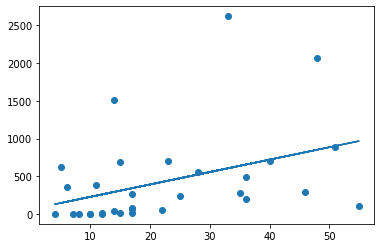

************************************************
Cluster: 6
r: 0.078


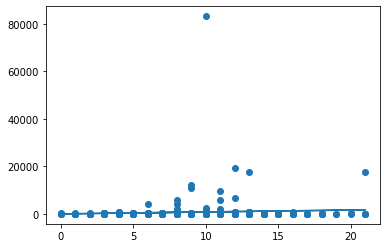

************************************************
Cluster: 7
r: 0.046


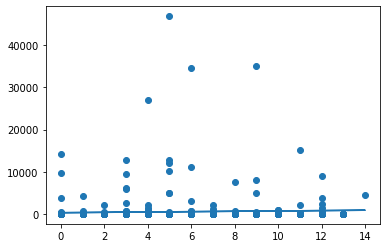

************************************************
Cluster: 8
r: 0.103


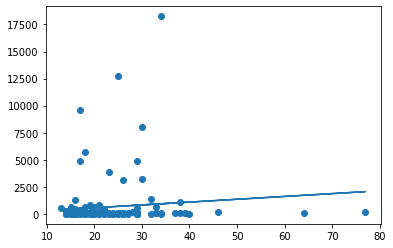

************************************************
Cluster: 9
r: 0.837


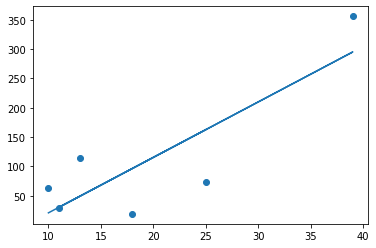

************************************************


In [143]:
for c in range(0,10):
    x = flood_df[flood_df.cluster == c]['Flood_and_Related_Events'].to_numpy()
    y = flood_df[flood_df.cluster == c]['Total_Coverage'].to_numpy()
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    mymodel = list(map(myfunc, x))
    print("Cluster:", c)
    print("r:", round(r,3))
    plt.scatter(x, y)
    plt.plot(x, mymodel)
    plt.show()
    print("************************************************")
    

All Clusters
r 0.077


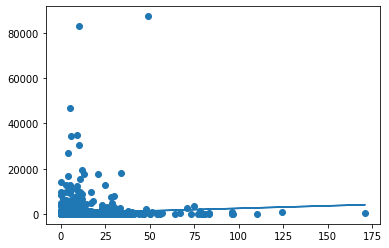

In [144]:
x = flood_df['Flood_and_Related_Events'].to_numpy()
y = flood_df['Total_Coverage'].to_numpy()
slope, intercept, r, p, std_err = stats.linregress(x, y)
mymodel = list(map(myfunc, x))
print("All Clusters")
print("r", round(r,3))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

<AxesSubplot:>

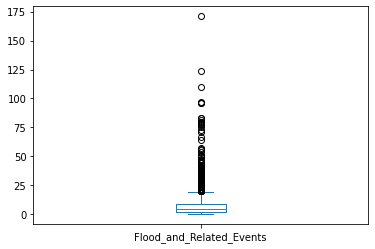

In [135]:
flood_df['Flood_and_Related_Events'].plot.box()

<AxesSubplot:>

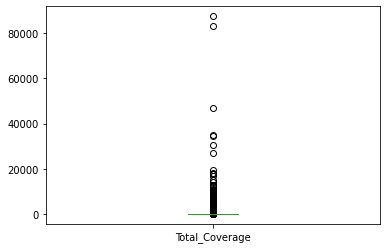

In [136]:
flood_df['Total_Coverage'].plot.box()

In [138]:
flood_df.sort_values(by ='Flood_and_Related_Events', ascending=False)

,location,Flood_and_Related_Events,cluster,State,County,Total_Coverage,POP_DENSITY,MEDIAN_INCOME
787,"POLK, IOWA",171,4,IOWA,POLK,396.290,750.5,47758
187,"SAN BERNARDINO, CALIFORNIA",124,2,CALIFORNIA,SAN BERNARDINO,774.613,101.5,42028
720,"BLACK HAWK, IOWA",110,2,IOWA,BLACK HAWK,127.390,231.7,36036
737,"DALLAS, IOWA",97,2,IOWA,DALLAS,26.345,112.4,54664
803,"WEBSTER, IOWA",96,2,IOWA,WEBSTER,7.611,53.1,34800
...,...,...,...,...,...,...,...,...
1354,"LIVINGSTON, MISSOURI",0,0,MISSOURI,LIVINGSTON,1.756,28.5,30313
1424,"MINERAL, MONTANA",0,0,MONTANA,MINERAL,2.060,3.5,37780
1356,"MACON, MISSOURI",0,0,MISSOURI,MACON,0.447,19.4,29931
575,"LEE, ILLINOIS",0,0,ILLINOIS,LEE,15.169,49.7,36098


In [139]:
flood_df.sort_values(by ='Total_Coverage', ascending=False)

,location,Flood_and_Related_Events,cluster,State,County,Total_Coverage,POP_DENSITY,MEDIAN_INCOME
2340,"HARRIS, TEXAS",49,3,TEXAS,HARRIS,87438.833,2402.4,44693
310,"MIAMI-DADE, FLORIDA",10,6,FLORIDA,MIAMI-DADE,83250.576,1315.5,34579
274,"BROWARD, FLORIDA",5,7,FLORIDA,BROWARD,46836.049,1444.9,41930
302,"LEE, FLORIDA",9,7,FLORIDA,LEE,35099.678,788.7,39651
317,"PALM BEACH, FLORIDA",6,7,FLORIDA,PALM BEACH,34468.729,670.2,44441
...,...,...,...,...,...,...,...,...
2105,"UNION, SOUTH CAROLINA",2,7,SOUTH CAROLINA,UNION,0.042,56.3,21002
1347,"KNOX, MISSOURI",1,0,MISSOURI,KNOX,0.038,8.2,19152
1446,"BLAINE, NEBRASKA",1,0,NEBRASKA,BLAINE,0.038,0.7,47292
797,"TAYLOR, IOWA",9,1,IOWA,TAYLOR,0.017,11.9,37222


## FEMA Public Assistance $

In [210]:
pa_df = pd.read_csv('/Users/rkfische/Dropbox/Aprojects/RKF_projects/IUDS/IU_Projects/CTILOperations/Workplans/Student_projects/Spring2023/Resilience/censusPlusWeather/PublicAssistanceFundedProjectsDetails.csv',parse_dates=['declarationDate'],
                   dtype = {
                       'disasterNumber': int,
                       'declarationDate': str,
                       'incidentType': str,
                       'pwNumber': int,
                       'applicationTitle': str,
                       'applicantId': str,
                       'damageCategoryCode': str,
                       'projectSize': str,
                       'county': str,
                       'countyCode': 'Int64',
                       'state': str,
                       'stateCode': str,
                       'stateNumberCode': int, 
                       'projectAmount': float,
                       'federalShareObligated': float,
                       'totalObligated': float,
                       'obligatedDate': str,
                       'dcc': str,
                       'damageCategory': str,
                       'lastRefresh': str,
                       'hash': str,
                       'id': str })

In [211]:
pa_df['Year'] = pa_df['declarationDate'].dt.year
pa_df['location'] = pa_df['county'].str.upper()+", "+pa_df['state'].str.upper()

In [212]:
pa_df.groupby(by='incidentType')['disasterNumber'].count()

incidentType
Biological            27927
Chemical                 54
Coastal Storm          3046
Dam/Levee Break         199
Drought                   1
Earthquake             5041
Fire                   9871
Flood                 86268
Freezing                200
Hurricane            248926
Mud/Landslide           320
Other                  1141
Severe Ice Storm      25313
Severe Storm         334833
Snowstorm             35673
Terrorist               107
Tornado                6311
Tsunami                 181
Typhoon                4135
Volcanic Eruption        78
Winter Storm             17
Name: disasterNumber, dtype: int64

In [213]:
pa_df.groupby(by='Year')['disasterNumber'].count()

Year
1998    15063
1999    24462
2000    15808
2001    28181
2002    18324
2003    30770
2004    58187
2005    71214
2006    27486
2007    39994
2008    73290
2009    40290
2010    47573
2011    85045
2012    23926
2013    15395
2014     8028
2015    13267
2016    17977
2017    39173
2018    16689
2019    21356
2020    40632
2021    12643
2022     4759
2023      110
Name: disasterNumber, dtype: int64

In [214]:
pa_obligated_df = pa_df[pa_df.incidentType == 'Flood'].groupby(by='location')['totalObligated'].sum()

In [215]:
pa_obligated_df = pa_obligated_df.reset_index()

In [224]:
pa_obligated_df.sort_values(by='totalObligated',ascending=False)

,location,totalObligated
1266,"STATEWIDE, CALIFORNIA",6.422210e+08
1302,"STATEWIDE, WEST VIRGINIA",3.787436e+08
1275,"STATEWIDE, LOUISIANA",3.272040e+08
117,"BOULDER, COLORADO",1.890617e+08
384,"E. BATON ROUGE, LOUISIANA",1.876092e+08
...,...,...
353,"DESOTO, MISSISSIPPI",3.859300e+03
459,"FULTON, PENNSYLVANIA",3.070330e+03
757,"LEHIGH, PENNSYLVANIA",2.830320e+03
360,"DILLINGHAM (CA), ALASKA",1.444700e+02


In [217]:
flood_df= pd.merge(flood_df, pa_obligated_df, on='location', how='inner')

In [218]:
flood_df['totalObligated']=flood_df['totalObligated']/1000000

In [221]:
flood_df.columns

Index(['location', 'Flood_and_Related_Events', 'cluster', 'State', 'County',
       'Total_Coverage', 'POP_DENSITY', 'MEDIAN_INCOME', 'totalObligated'],
      dtype='object')

All Clusters
r 0.086


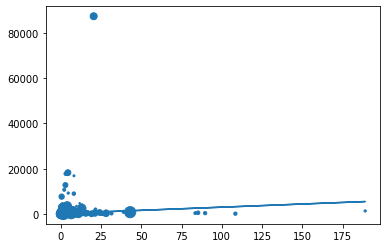

In [222]:
x = flood_df['totalObligated'].to_numpy()
y = flood_df['Total_Coverage'].to_numpy()
size = flood_df['Flood_and_Related_Events']
slope, intercept, r, p, std_err = stats.linregress(x, y)
mymodel = list(map(myfunc, x))
print("All Clusters")
print("r", round(r,3))
plt.scatter(x, y, s=size)
plt.plot(x, mymodel)
plt.show()


#plt.scatter(x, y, s=area, c=colors, alpha=0.5)

Cluster: 0
r: 0.109


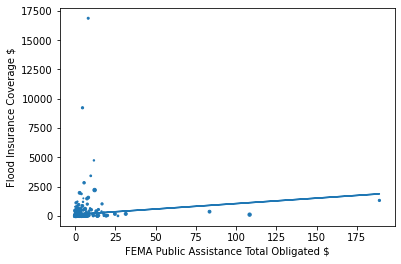

************************************************
Cluster: 1
r: 0.043


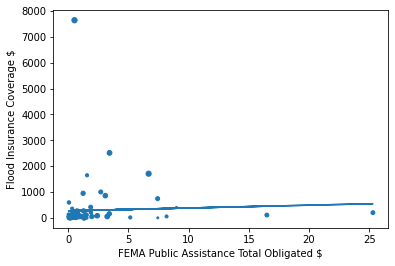

************************************************
Cluster: 2
r: 0.412


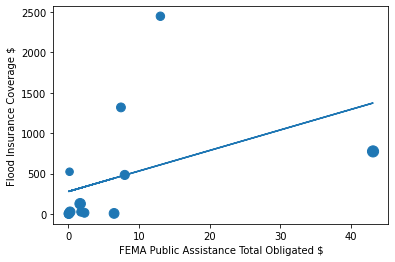

************************************************
Cluster: 3
r: 0.561


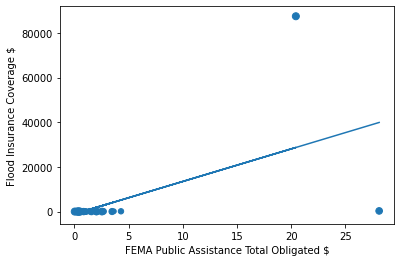

************************************************
Cluster: 4
r: 1.0


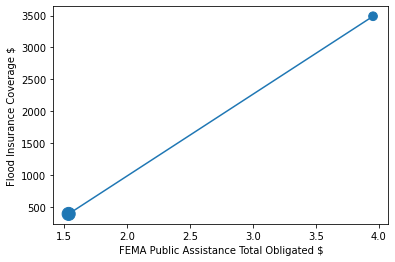

************************************************
Cluster: 5
r: 0.8


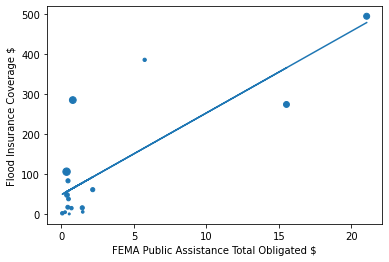

************************************************
Cluster: 6
r: 0.034


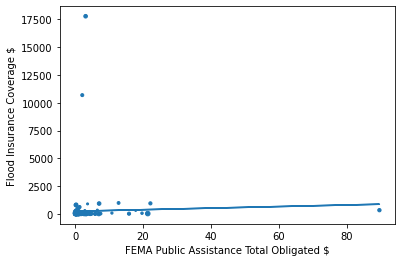

************************************************
Cluster: 7
r: 0.092


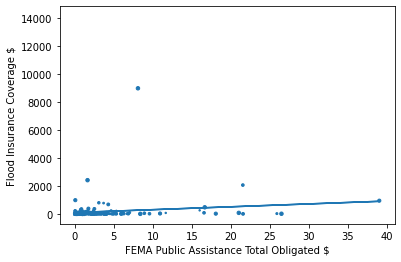

************************************************
Cluster: 8
r: 0.021


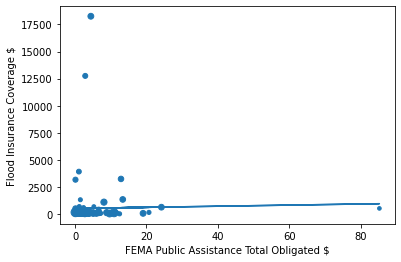

************************************************
Cluster: 9
r: 0.0


/Users/rkfische/Library/Python/3.10/lib/python/site-packages/scipy/stats/_stats_mstats_common.py:175: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/Users/rkfische/Library/Python/3.10/lib/python/site-packages/scipy/stats/_stats_mstats_common.py:189: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/rkfische/Library/Python/3.10/lib/python/site-packages/scipy/stats/_stats_mstats_common.py:192: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


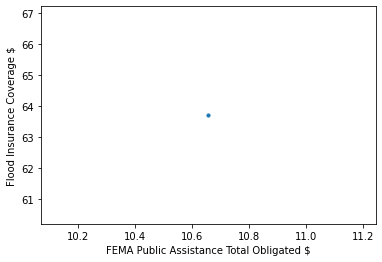

************************************************


In [223]:
for c in range(0,10):
    x = flood_df[flood_df.cluster == c]['totalObligated'].to_numpy()
    y = flood_df[flood_df.cluster == c]['Total_Coverage'].to_numpy()
    size = flood_df[flood_df.cluster == c]['Flood_and_Related_Events']
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    mymodel = list(map(myfunc, x))
    print("Cluster:", c)
    print("r:", round(r,3))
    plt.scatter(x, y, s=size)
    plt.plot(x, mymodel)
    plt.ylabel('Flood Insurance Coverage $m')
    plt.xlabel("FEMA Public Assistance Total Obligated $m")
    plt.show()
    print("************************************************")
    

In [225]:
flood_df.sort_values(by = 'totalObligated', ascending=False)

,location,Flood_and_Related_Events,cluster,State,County,Total_Coverage,POP_DENSITY,MEDIAN_INCOME,totalObligated
73,"BOULDER, COLORADO",5,0,COLORADO,BOULDER,1321.804,405.6,53712,189.061687
621,"CASS, NEBRASKA",11,0,NEBRASKA,CASS,110.307,45.3,38827,108.436538
632,"DOUGLAS, NEBRASKA",11,6,NEBRASKA,DOUGLAS,335.972,1574.4,42652,89.664477
790,"WARD, NORTH DAKOTA",13,8,NORTH DAKOTA,WARD,513.482,30.6,42012,85.254835
80,"LARIMER, COLORADO",8,0,COLORADO,LARIMER,361.519,115.4,46081,83.538445
...,...,...,...,...,...,...,...,...,...
923,"MCCORMICK, SOUTH CAROLINA",0,0,SOUTH CAROLINA,MCCORMICK,13.925,28.5,35922,0.009399
356,"ROBERTSON, KENTUCKY",1,0,KENTUCKY,ROBERTSON,0.176,22.8,26912,0.006141
871,"FRANKLIN, PENNSYLVANIA",3,0,PENNSYLVANIA,FRANKLIN,59.834,193.7,40503,0.005509
872,"FULTON, PENNSYLVANIA",0,0,PENNSYLVANIA,FULTON,4.169,33.9,29353,0.003070


## IDHS EMS runs

In [146]:
idhs_df= pd.read_csv('/Users/rkfische/Dropbox/Aprojects/RKF_projects/IUDS/IU_Projects/CTILOperations/Konnex/ems_runs_2022.csv')

In [149]:
idhs_df.columns

Index(['INCIDENT_DT', 'INCIDENT_COUNTY', 'CHIEF_COMPLAINT_DISPATCH',
       'CHIEF_COMPLAINT_ANATOMIC_LOC', 'PRIMARY_SYMPTOM',
       'PROVIDER_IMPRESSION_PRIMARY', 'DISPOSITION_ED', 'DISPOSITION_HOSPITAL',
       'INJURY_FLG', 'NALOXONE_GIVEN_FLG', 'MEDICATION_GIVEN_OTHER_FLG',
       'DESTINATION_TYPE', 'PROVIDER_TYPE_STRUCTURE', 'PROVIDER_TYPE_SERVICE',
       'PROVIDER_TYPE_SERVICE_LEVEL', 'PROVIDER_TO_SCENE_MINS',
       'PROVIDER_TO_DESTINATION_MINS', 'UNIT_NOTIFIED_BY_DISPATCH_DT',
       'UNIT_ARRIVED_ON_SCENE_DT', 'UNIT_ARRIVED_TO_PATIENT_DT',
       'UNIT_LEFT_SCENE_DT', 'PATIENT_ARRIVED_DESTINATION_DT'],
      dtype='object')

In [160]:
idhs_df['PROVIDER_TO_SCENE_MINS'].median()

6.0

<AxesSubplot:title={'center':'PROVIDER_TO_SCENE_MINS'}, xlabel='[INCIDENT_COUNTY]'>

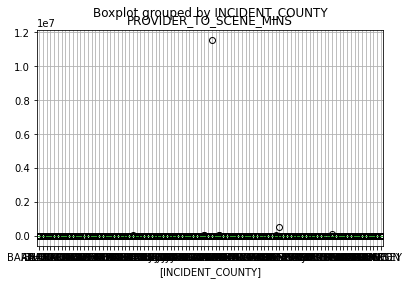

In [168]:
idhs_df.boxplot(column = ['PROVIDER_TO_SCENE_MINS'], by=['INCIDENT_COUNTY'])

In [163]:
idhs_df.groupby(by=['PRIMARY_SYMPTOM'])['UNIT_NOTIFIED_BY_DISPATCH_DT'].count().sort_values(ascending = False)

PRIMARY_SYMPTOM
WEAKNESS                                                                    102440
OTHER GENERAL SYMPTOMS AND SIGNS                                             54788
ALTERED MENTAL STATUS                                                        38075
PAIN, UNSPECIFIED                                                            32545
SHORTNESS OF BREATH                                                          28681
                                                                             ...  
PRETERM NEWBORN, GESTATIONAL AGE 36 COMPLETED WEEKS                              1
CONGENITAL DEFORMITY OF SPINE                                                    1
LOBAR PNEUMONIA, UNSPECIFIED ORGANISM                                            1
CONGENITAL MALFORMATION OF CARDIAC CHAMBERS AND CONNECTIONS, UNSPECIFIED         1
SINGLE LIVEBORN INFANT, UNSPECIFIED AS TO PLACE OF BIRTH                         1
Name: UNIT_NOTIFIED_BY_DISPATCH_DT, Length: 887, dtype: int64

In [ ]:
df.boxplot(column=['Col1', 'Col2'], by=['X', 'Y'])